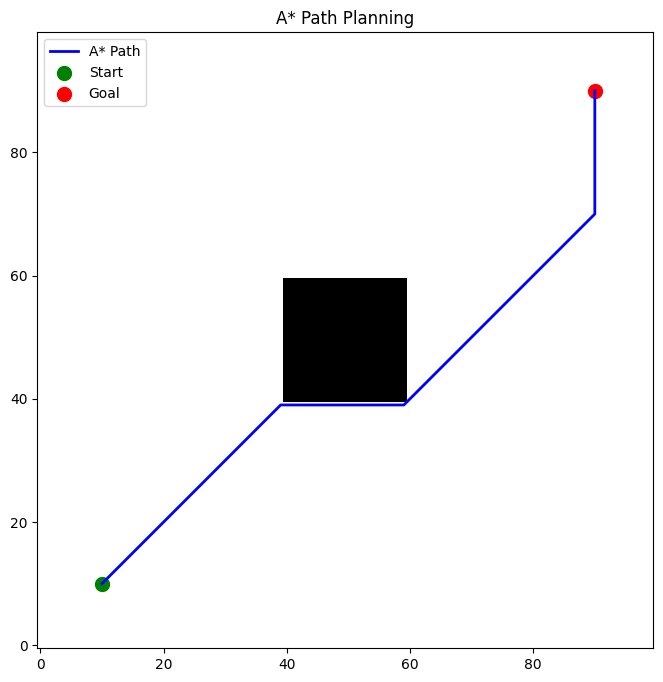

Roadmap constructed with 9600 nodes.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from queue import PriorityQueue

# === Environment Setup ===
grid_size = (100, 100)  # Grid size (100x100)
start = (10, 10)  # Start position (row, col)
goal = (90, 90)  # Goal position (row, col)

# Create a grid with obstacles (1: obstacle, 0: free space)
grid = np.zeros(grid_size)
grid[40:60, 40:60] = 1  # Obstacle in the middle

# === A* Search Parameters ===
# Directions for 8-connected grid (up, down, left, right, diagonals)
directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]

# Heuristic function: Manhattan distance
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# A* Algorithm
def astar(grid, start, goal):
    rows, cols = grid.shape
    open_list = PriorityQueue()
    open_list.put((0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while not open_list.empty():
        _, current = open_list.get()

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]

        for direction in directions:
            neighbor = (current[0] + direction[0], current[1] + direction[1])

            # Check if the neighbor is within bounds and not an obstacle
            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and grid[neighbor[0], neighbor[1]] == 0:
                tentative_g_score = g_score[current] + 1

                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                    open_list.put((f_score[neighbor], neighbor))

    return None  # No path found

# === Roadmap Construction ===
def construct_roadmap(grid):
    rows, cols = grid.shape
    roadmap = {}

    for i in range(rows):
        for j in range(cols):
            if grid[i, j] == 0:  # Free space
                neighbors = []
                for direction in directions:
                    ni, nj = i + direction[0], j + direction[1]
                    if 0 <= ni < rows and 0 <= nj < cols and grid[ni, nj] == 0:
                        neighbors.append((ni, nj))
                roadmap[(i, j)] = neighbors

    return roadmap

# === Visualization ===
def plot_path(grid, path):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(grid, cmap='gray_r', origin='lower')
    path_x, path_y = zip(*path)
    ax.plot(path_y, path_x, color='blue', linewidth=2, label='A* Path')
    ax.scatter(start[1], start[0], color='green', s=100, label='Start')
    ax.scatter(goal[1], goal[0], color='red', s=100, label='Goal')
    ax.legend()
    plt.title("A* Path Planning")
    plt.show()

# === Run A* Search and Visualize Path ===
path = astar(grid, start, goal)
if path:
    plot_path(grid, path)
else:
    print("No path found!")

# === Roadmap Construction ===
roadmap = construct_roadmap(grid)
print("Roadmap constructed with", len(roadmap), "nodes.")
